In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
hawaii_measurements = base.classes.measurement
hawaii_stations = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
last_row = session.query(hawaii_measurements).order_by(hawaii_measurements.date.desc()).first()
print(last_row.date)

2017-08-23


<Axes: xlabel='Date', ylabel='Inches'>

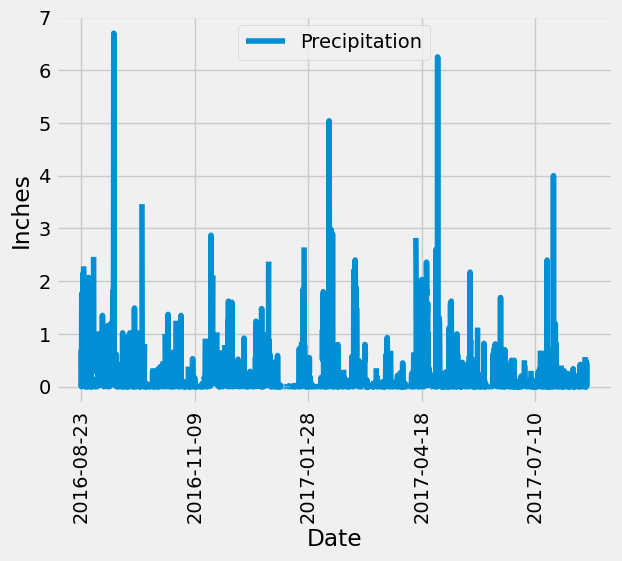

In [88]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
    
# Calculate the date one year from the last date in data set.
year_ago_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(year_ago_date)

# Perform a query to retrieve the data and precipitation scores
prev_12_months = session.query(hawaii_measurements.date, hawaii_measurements.prcp).\
    filter(hawaii_measurements.date > "2016-08-22").\
    order_by(hawaii_measurements.date.desc()).all()
#print(prev_12_months)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prev_12_mo_df = pd.DataFrame(prev_12_months, columns=["Date", "Precipitation"])
# prev_12_mo_df = prev_12_mo_df.dropna(how="any")
#prev_12_mo_df

# Sort the dataframe by date
prev_12_mo_df = prev_12_mo_df.sort_values(by="Date", ascending=True)
# prev_12_mo_df

# Use Pandas Plotting with Matplotlib to plot the data
prev_12_mo_df.plot("Date", "Precipitation", rot=90, ylabel="Inches")


In [90]:
# Use Pandas to calculate the summary statistics for the precipitation data
prev_12_mo_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [108]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(hawaii_measurements.station).distinct().count()
total_stations

9

In [119]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
total_active_stations = session.query(hawaii_measurements.station, (func.count(hawaii_measurements.station))).\
    group_by(hawaii_measurements.station).\
    order_by(func.count(hawaii_measurements.station).desc()).all()
total_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

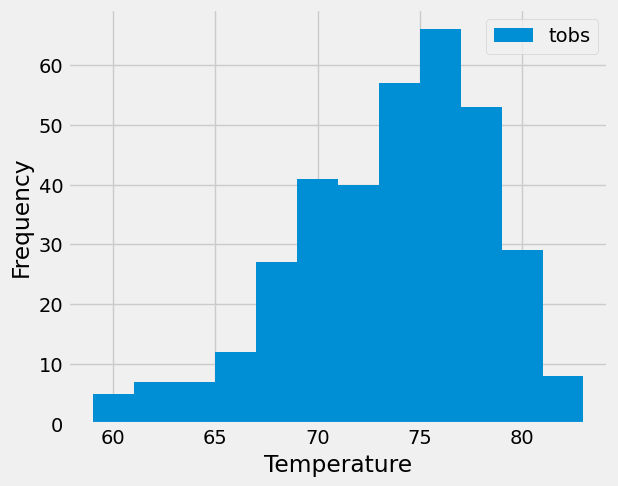

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()